In [2]:
from datasets.kitti_loader import KITTILoader

image_num = '0001'

kframes = KITTILoader.load_labelled_frames('/home/ray/Data/KITTI/training/image_02/'+image_num,'/home/ray/Data/KITTI/training/label_02/'+image_num+'.txt')

The source has 200 items
200 frames found
Num crop objs in sample: 4


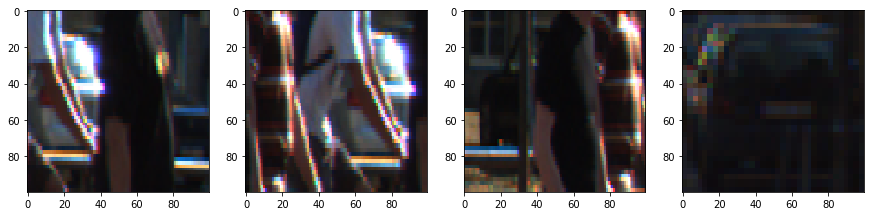

In [1]:
from data_loading.sources.kitti_source import KITTISource
from data_loading.samplers.crop_sampler import CropSampler
from image.visualization import tensor_to_pil_image_array,visualize_pil_array
%matplotlib inline
source = KITTISource('/home/ray/Data/KITTI/training',max_frames=200)
sampler_params = {'crop_size':[100,100],'obj_types':['Car']}
cs = CropSampler(source,sampler_params)
sample = cs.next()
pil_arr = tensor_to_pil_image_array(sample.data)
visualize_pil_array(pil_arr)

torch.Size([9, 3, 200, 150])


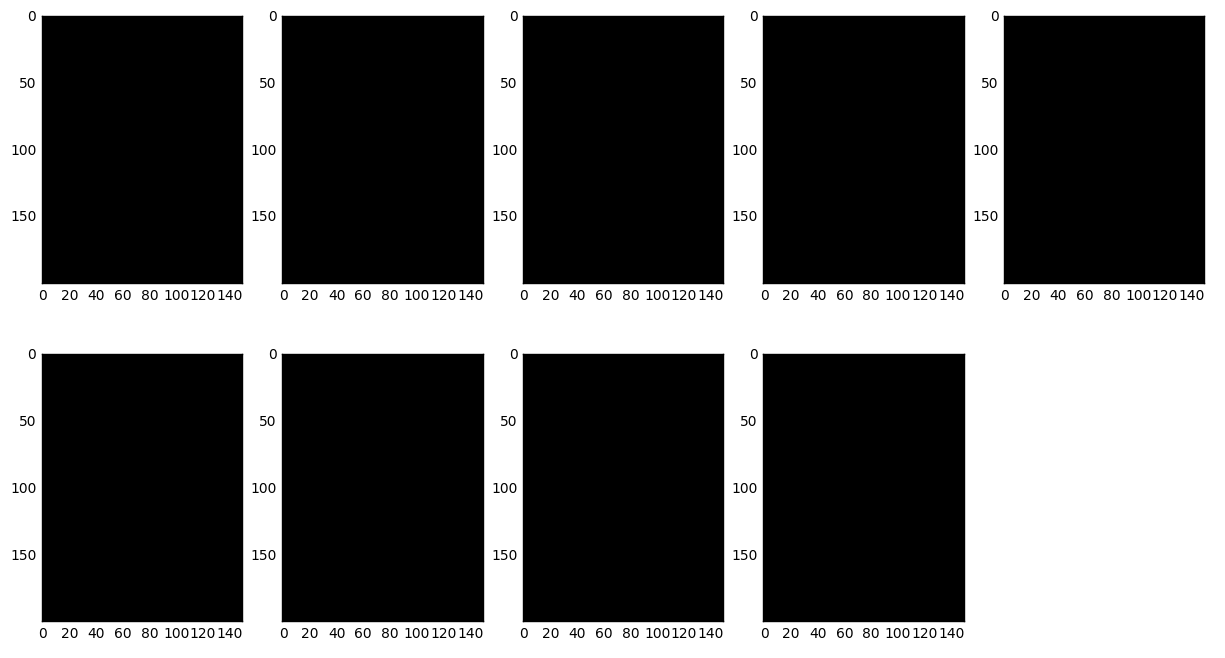

In [5]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from networks.conv_stack import ConvolutionStack as CS
cs = CS(3)
cs.append(3,3,1)
cs.append(3,3,1)
cs.append(6,3,1)
v = Variable(sample.data)
from networks.autoencoder import AutoEncoder
AE = AutoEncoder()
output = AE.forward(v)
print output.size()
output.type
pil_arr = tensor_to_pil_image_array(output.data)
visualize_pil_array(pil_arr)

In [ ]:
sample.data.size()

In [ ]:
# kwargs = {}
# train_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../Data/mnist', train=True, download=True,
#                    transform=transforms.ToTensor()),
#     batch_size=1, shuffle=True, **kwargs)
# for batch_idx, (data, _) in enumerate(train_loader):
#     print data.size()

In [ ]:
frame = 10
ks.frames[frame].load_image()
# print ks.frames[0].image
ks.frames[frame].show_image()

In [ ]:
import numpy as np
x = ks.frames[10].image
y = np.asarray(x)
print y.shape
np.transpose(y,axes=(2,0,1)).shape

In [ ]:
im = ks.frames[0].image.crop((100,100,150,150))
im.resize((100,100))


In [ ]:
'{0},{1}'.format('one','two')

In [8]:
from image.affine import Affine
from image.box import Box
import numpy as np
x = Affine()
x.append(Affine.scaling(10,10))
x.append(Affine.translation(1,1))
print x.transform
c = np.array([[5,2],[5,2],[1,1]])
print c.T
y = x.apply_to_coords(c)
print y
x.unapply_to_coords(y)

ab = Affine.from_box(Box(10,10,20,20))
ab.apply_to_coords([[100],[100],[1]])

[[10  0  1]
 [ 0 10  1]
 [ 0  0  1]]
[[5 5 1]
 [2 2 1]]
[[51 21]
 [51 21]
 [ 1  1]]


array([[110],
       [110],
       [  1]])

In [1]:
from data_loading.samplers.crop_resizer import generate_new_crop
from image.box import Box

crop_params = {'output_dims':[100,100]}
generate_new_crop(None,Box(20,20,50,50),crop_params)


transformed_box: [[  6.18019182e+02   1.51801918e+03]
 [  6.18019182e+02   1.51801918e+03]
 [  1.00000000e+00   1.00000000e+00]]
transformed_box: Box [[x0,y0],[x1,y1]]:[[0, 0], [1518.0191817877076, 1518.0191817877076]]


Box [[x0,y0],[x1,y1]]:[[0, 0], [1518.0191817877076, 1518.0191817877076]]

In [1]:
from utils.memory import Memory
m = Memory()
m.resident()

38.0234375

In [2]:
torch.Tensor(np.array([[4,2],[5,6]]))

NameError: name 'torch' is not defined

In [ ]:
import numpy as np
c = np.array([[5,2],[5,2],[1,1]])
c.shape

In [ ]:

for i,x in enumerate(trainloader):
    b = x
    if i>1:
        break
npb = b[0].numpy()
npb.flags['C_CONTIGUOUS']
npb.shape